# ✅ STEP 1: Load & Explore the Data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Load data
df = pd.read_csv("/content/ola_driver_scaler.csv")

# ✅ STEP 2: Data Structure and Types

In [96]:
# Initial Inspection
print(df.shape)
print(df.info())
print(df.head())

(19104, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB
N

# ✅ STEP 3: Convert Date Columns

In [97]:
# Convert dates
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%d/%m/%y')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y', errors='coerce')

In [98]:
# Data Types & Summary
print(df.describe(include='all'))
print(df.isnull().sum())

          Unnamed: 0                         MMM-YY     Driver_ID  \
count   19104.000000                          19104  19104.000000   
unique           NaN                            NaN           NaN   
top              NaN                            NaN           NaN   
freq             NaN                            NaN           NaN   
mean     9551.500000  2019-07-04 22:36:06.331658240   1415.591133   
min         0.000000            2019-01-01 00:00:00      1.000000   
25%      4775.750000            2019-01-06 00:00:00    710.000000   
50%      9551.500000            2019-01-12 00:00:00   1417.000000   
75%     14327.250000            2020-01-07 00:00:00   2137.000000   
max     19103.000000            2020-01-12 00:00:00   2788.000000   
std      5514.994107                            NaN    810.705321   

                 Age        Gender   City  Education_Level         Income  \
count   19043.000000  19052.000000  19104     19104.000000   19104.000000   
unique           

### ✅ 2. Initial Data Observations

#### 📊 Data Shape & Structure

- Rows: **19,104**, Columns: **14**
- Mixed data types:
  - Numerical: `float64`, `int64`
  - Categorical/Text: `object`

#### 🔍 Missing Values

| Column           | Missing Count | % Missing   |
|------------------|----------------|-------------|
| Age              | 61             | ~0.32%      |
| Gender           | 52             | ~0.27%      |
| LastWorkingDate  | 17,488         | ~91.5%      |

---

### ✅ 3. Statistical Summary of Numerical Columns

| Variable               | Mean       | Min        | Max         | Std Dev    | Notes                         |
|------------------------|------------|------------|-------------|------------|-------------------------------|
| Age                    | 34.7       | 21         | 58          | 6.26       | Normal working-age range      |
| Income                 | 65,652.02  | 10,747     | 188,418     | 30,914.5   | Wide range; check for skew    |
| Total Business Value   | 571,662.14 | -6,000,000 | 33,747,720  | 1,128,312  | Large outliers present        |
| Quarterly Rating       | 2.01       | 1          | 4           | 1.01       | Discrete rating (1 to 4)      |


# ✅ STEP 4: KNN Imputation

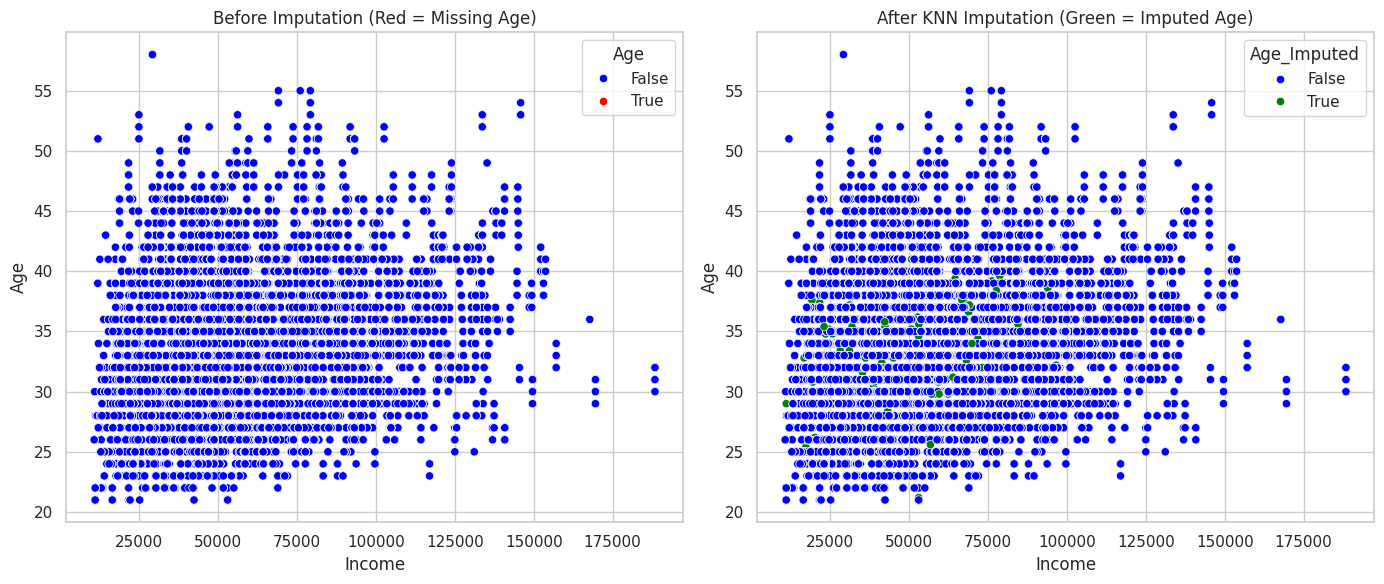

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Make a copy before imputation
df_pre = df.copy()

# Only numerical columns for KNN
num_cols = ['Age', 'Income', 'Total Business Value']
df_num = df[num_cols]

# Save mask of missing values
missing_mask = df_num['Age'].isna()

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=num_cols)

# Create new column to track imputation
df_imputed['Age_Imputed'] = df_num['Age'].isna()

# Plot Income vs Age before and after
plt.figure(figsize=(14, 6))

# Before Imputation
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_num['Income'], y=df_num['Age'], hue=missing_mask, palette={True: 'red', False: 'blue'})
plt.title('Before Imputation (Red = Missing Age)')
plt.xlabel('Income')
plt.ylabel('Age')

# After Imputation
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_imputed['Income'], y=df_imputed['Age'], hue=df_imputed['Age_Imputed'], palette={True: 'green', False: 'blue'})
plt.title('After KNN Imputation (Green = Imputed Age)')
plt.xlabel('Income')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


In [122]:
from sklearn.impute import KNNImputer

# Select only numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
df_num = df[num_cols]

# Check missing values
print(df_num.isnull().sum())

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=num_cols)

# Replace original numerical columns with imputed ones
df[num_cols] = df_num_imputed

# Confirm imputation
print(df.isnull().sum())

Unnamed: 0               0
Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64
Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


# ✅ STEP 5: Aggregate Driver Data (Groupby)

In [101]:
# Group by Driver_ID
agg_df = df.groupby('Driver_ID').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Total Business Value': 'mean',
    'Quarterly Rating': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'first',
    'Joining Designation': 'first',
    'Grade': 'first',
    'Dateofjoining': 'first',
    'LastWorkingDate': 'last'
}).reset_index()

In [102]:
agg_df.shape

(2381, 12)

# ✅ STEP 6: Feature Engineering

In [103]:
# Target variable: 1 if driver has left (has a LastWorkingDate)
agg_df['Attrition'] = agg_df['LastWorkingDate'].notnull().astype(int)

agg_df['Quarterly Rating Change'] = (df.groupby('Driver_ID')['Quarterly Rating'].apply(lambda x: int(x.iloc[-1] > x.iloc[0]))).values
agg_df['Income Change'] = (df.groupby('Driver_ID')['Income'].apply(lambda x: int(x.iloc[-1] > x.iloc[0]))).values

# ✅ STEP 7: Statistical Summary of Final Dataset

In [104]:
agg_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,NaN,NaN,NaN,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Age,2381.0,NaN,NaN,NaN,33.369298,21.0,29.0,33.0,37.0,58.0,5.890567
Income,2381.0,NaN,NaN,NaN,59232.460484,10747.0,39104.0,55285.0,75835.0,188418.0,28298.214012
Total Business Value,2381.0,NaN,NaN,NaN,312085.359327,-197932.857143,0.0,150624.444444,429498.75,3972127.5,449570.506711
Quarterly Rating,2381.0,NaN,NaN,NaN,1.52037,1.0,1.0,1.0,2.0,4.0,0.810711
Gender,2381.0,NaN,NaN,NaN,0.410332,0.0,0.0,0.0,1.0,1.0,0.491997
City,2381,29,C20,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,2381.0,NaN,NaN,NaN,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Joining Designation,2381.0,NaN,NaN,NaN,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,NaN,NaN,NaN,2.078538,1.0,1.0,2.0,3.0,5.0,0.931321


In [105]:
# Optional: Increase plot resolution
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 📊 Univariate Analysis

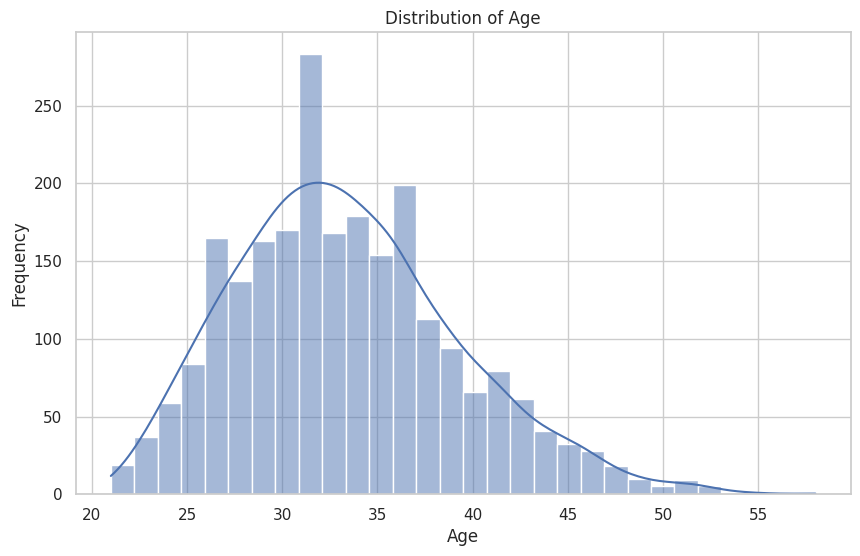

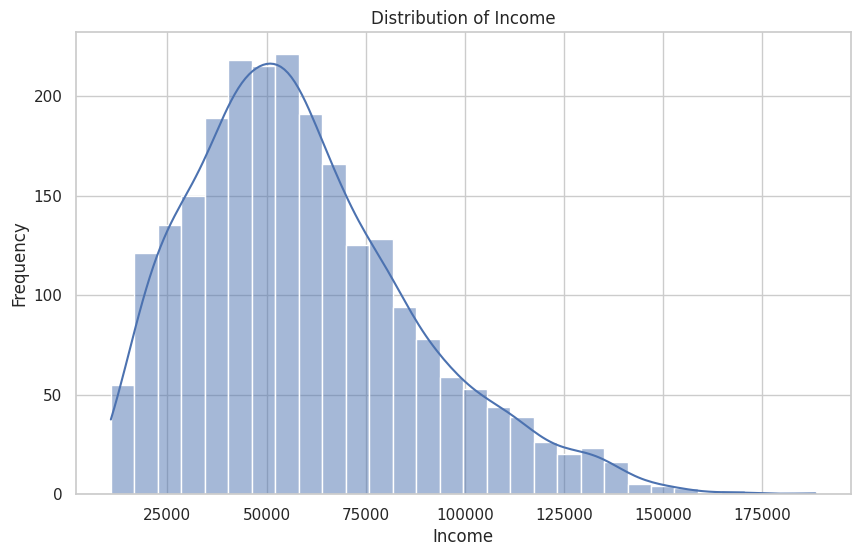

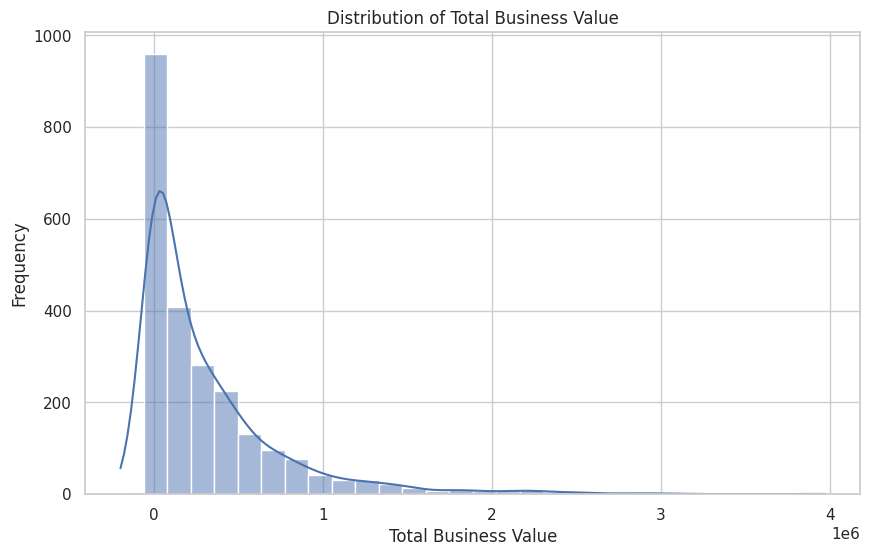

In [106]:
# Continuous Variables
continuous_vars = ['Age', 'Income', 'Total Business Value']

for col in continuous_vars:
    plt.figure()
    sns.histplot(agg_df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## 1. Distribution of Age
- The age distribution appears **right-skewed**.
- Most employees are **younger**, likely in their **20s to early 30s**.
- A few outliers exist at the higher age range.

## 2. Distribution of Income
- **Right-skewed** distribution.
- Most employees earn **lower to mid-range salaries**.
- High-income outliers may represent **senior or high-performing roles**.

## 3. Distribution of Total Business Value
- Shows a **long right tail**, indicating a few employees generate **very high business value**.
- Majority generate **moderate business value**, suggesting a **Pareto distribution** pattern.

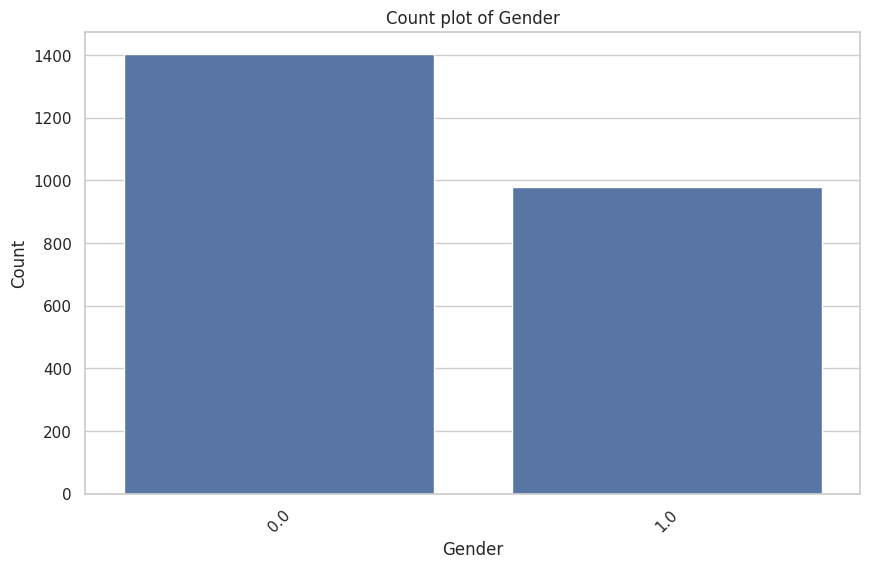

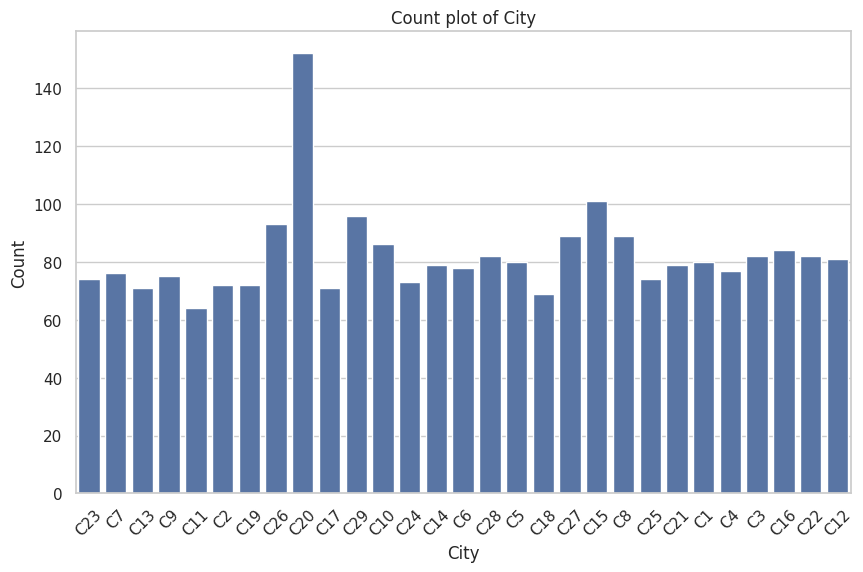

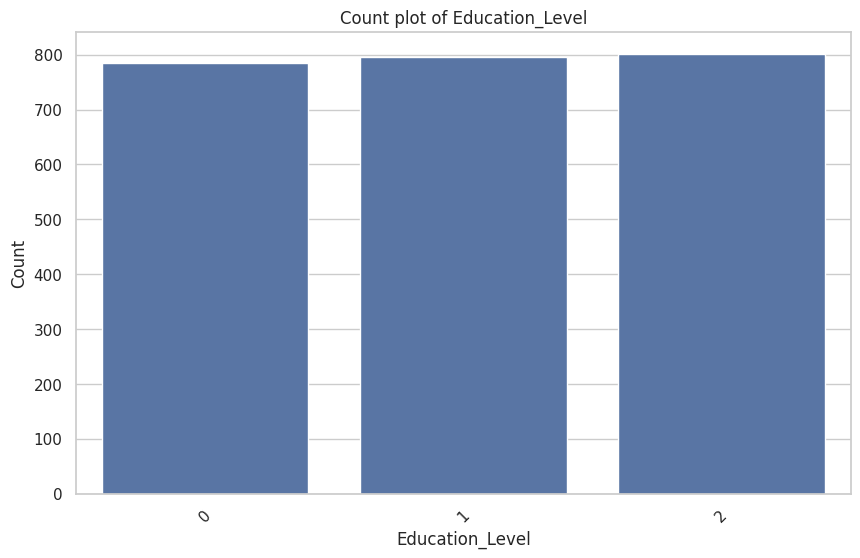

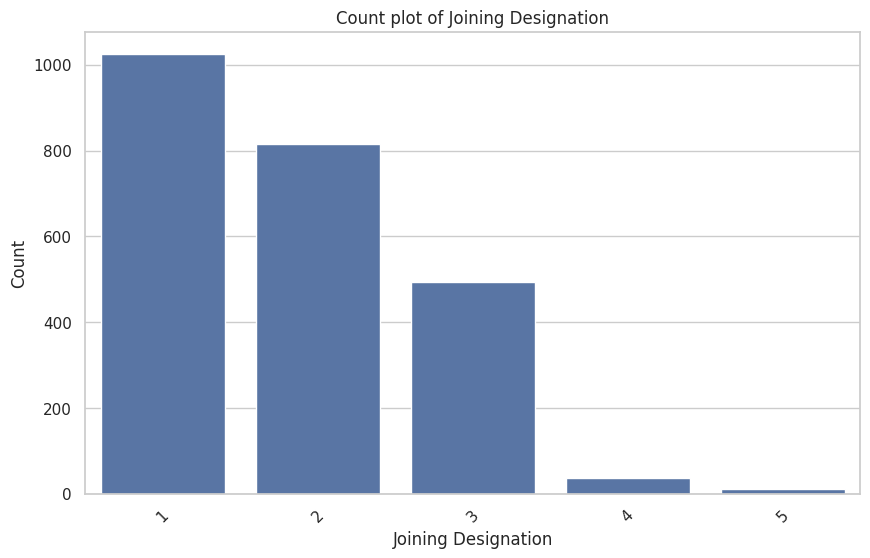

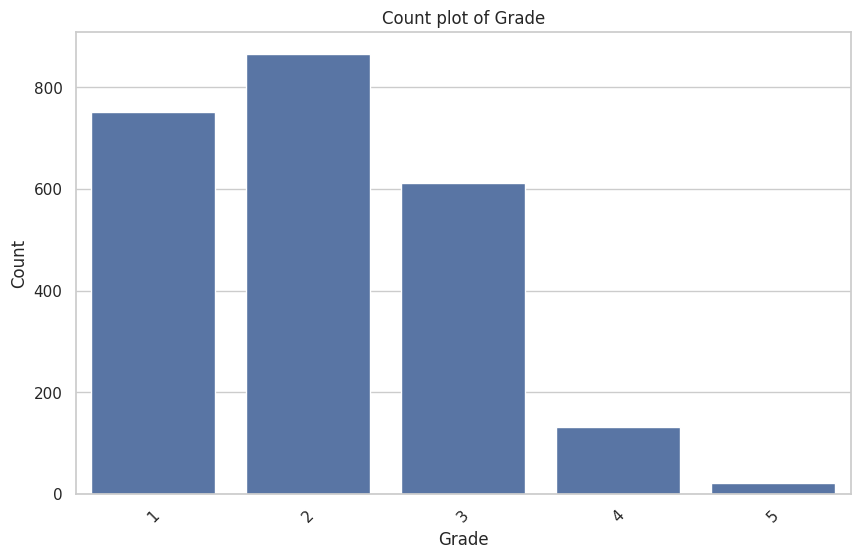

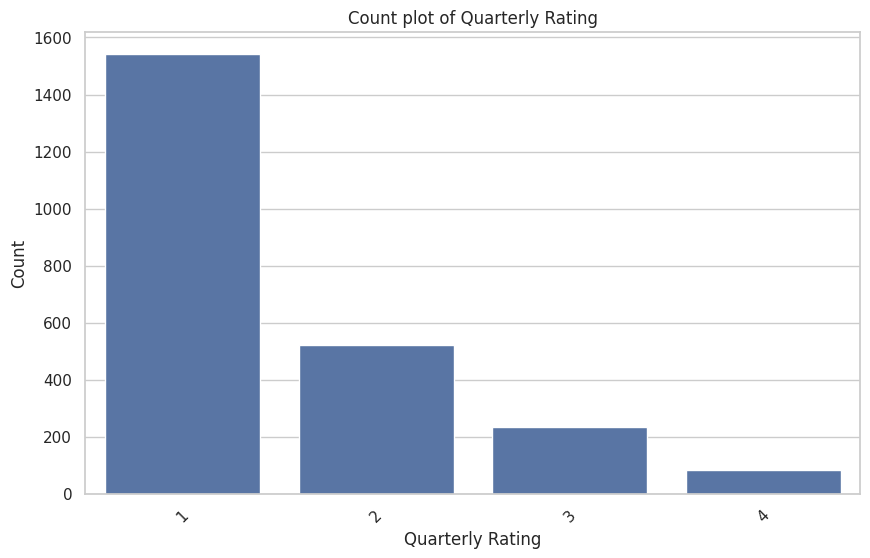

In [107]:
# Categorical Variables
categorical_vars = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating']

for col in categorical_vars:
    plt.figure()
    sns.countplot(x=col, data=agg_df)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()


## 4. Count Plot of Gender
- **Imbalanced gender representation**.
- **More male employees** than female.

## 5. Count Plot of Education Level
- Most employees have **Bachelor’s or Master’s degrees**.
- Very few employees have education levels below Bachelor's or above Master's (e.g., PhD).

## 6. Count Plot of City
- **Uneven distribution** across cities.
- Some cities have a **significantly higher employee count**, possibly regional headquarters or operational hubs.

## 7. Count Plot of Joining Designation
- Wide variety of designations.
- **Entry-level or mid-level roles** dominate.

## 8. Count Plot of Grade
- Certain grades are **more common**, indicating a **pyramidal hierarchy**.
- Lower grades have the highest employee count.

## 9. Count Plot of Quarterly Rating
- Most employees received **mid-range ratings (3-4)**.
- Few extreme high or low ratings suggest a **moderate performance bias**.

# 📊 Univariate Analysis Summary with Recommendations

## 1. Distribution of Age
- **Insight:** The age distribution appears right-skewed. Most employees are younger, likely in their 20s to early 30s.
- **Recommendation:**
  - Consider age-based mentorship programs to leverage the experience of older employees.
  - Align employee benefits and career development programs with the needs of a younger workforce.

## 2. Distribution of Total Business Value
- **Insight:** Shows a long right tail—few employees generate very high business value.
- **Recommendation:**
  - Recognize and reward high performers to maintain motivation.
  - Analyze what drives high business value and apply best practices across the organization.

## 3. Distribution of Income
- **Insight:** Most employees earn lower to mid-range salaries; income distribution is right-skewed.
- **Recommendation:**
  - Conduct a compensation benchmarking study to ensure fairness and competitiveness.
  - Introduce performance-linked bonuses to motivate mid-range earners.

## 4. Count Plot of Gender
- **Insight:** More male employees than female.
- **Recommendation:**
  - Promote gender diversity in hiring practices.
  - Ensure equal growth opportunities and workplace support for all genders.

## 5. Count Plot of Education Level
- **Insight:** Majority have Bachelor’s or Master’s degrees.
- **Recommendation:**
  - Offer advanced learning programs (e.g., certification, executive courses).
  - Utilize the existing educational background for specialized projects and innovation.

## 6. Count Plot of City
- **Insight:** Uneven employee distribution across cities.
- **Recommendation:**
  - Investigate if the geographic concentration aligns with business needs.
  - Optimize office resources and infrastructure based on employee distribution.

## 7. Count Plot of Joining Designation
- **Insight:** Entry-level and mid-level roles dominate.
- **Recommendation:**
  - Strengthen onboarding and early career development programs.
  - Develop leadership training to build a pipeline for senior roles.

## 8. Count Plot of Grade
- **Insight:** Certain grades are more common, indicating a pyramidal structure.
- **Recommendation:**
  - Review promotion criteria and employee progression timelines.
  - Ensure clear role expectations and career pathways at each grade level.

## 9. Count Plot of Quarterly Rating
- **Insight:** Most employees received mid-range ratings (3-4).
- **Recommendation:**
  - Re-evaluate the performance appraisal process to reduce rating bias.
  - Provide regular feedback and development goals to improve low performers and further boost high performers.


# 📈 Bivariate Analysis

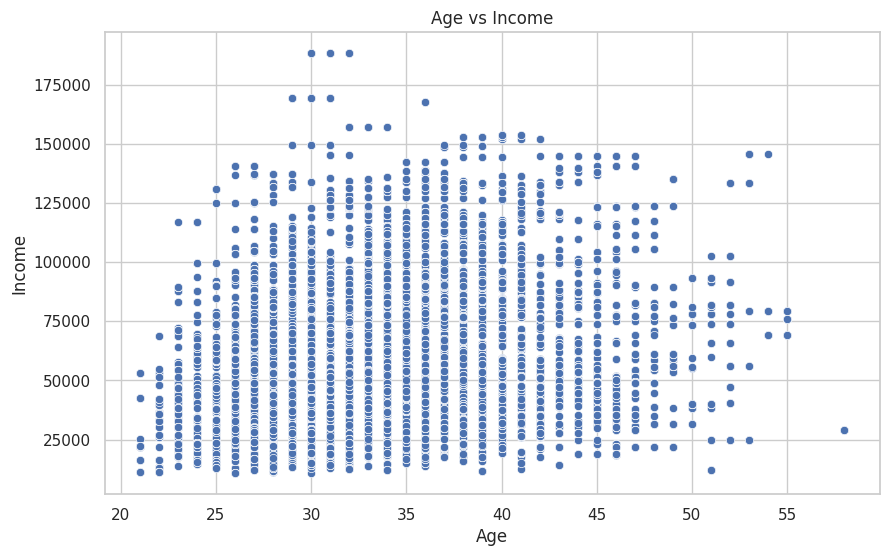

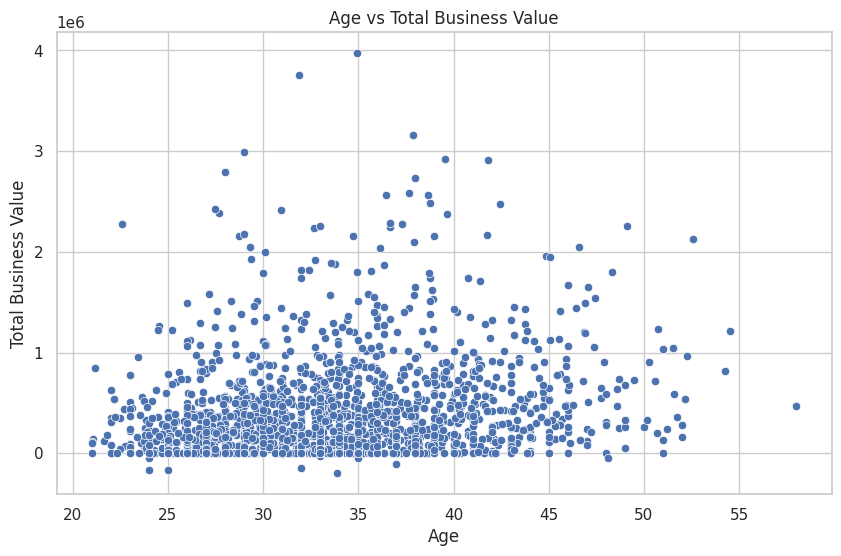

In [108]:
# Continuous vs Continuous
# Scatter plot between Age and Income
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Age vs Income')
plt.show()

# Scatter plot between Age and Total Business Value
sns.scatterplot(x='Age', y='Total Business Value', data=agg_df)
plt.title('Age vs Total Business Value')
plt.show()


## Bivariate Analysis: Continuous vs Continuous

### 1. Scatter Plot: Age vs Income

![Age vs Income](./age%20vs%20income.png)

**Insights:**
- Income tends to increase with age, peaking between the age group of 30 to 40.
- After the age of 40, income levels show a decline or stagnation for many individuals.
- There's a high density of individuals earning between 50,000 and 150,000 in the 30–40 age range.

**Recommendations:**
- Consider targeting training and development programs at employees aged 25–30 to accelerate income growth potential.
- Explore options for mid-career transitions or promotions around the 35–40 age bracket to maintain upward income trajectory.
- Address potential decline in productivity or role stagnation beyond age 45 with flexible roles or lateral mobility opportunities.

---

### 2. Scatter Plot: Age vs Total Business Value

![Age vs Total Business Value](./age%20vs%20total%20business%20value.png)

**Insights:**
- Total Business Value is more dispersed compared to income and shows high variance across all age groups.
- Some individuals in the 30–40 age group achieve exceptionally high business value contributions.
- Outliers exist in both younger (under 30) and older (over 50) age groups, but they are rare.

**Recommendations:**
- Focus on grooming entrepreneurial talent between 30–40, where peak value contribution is observed.
- Encourage mentorship programs pairing older employees (who show occasional high business value) with younger ones to share strategies.
- Implement initiatives to capture and replicate high-value behaviors seen in outlier performers regardless of age.



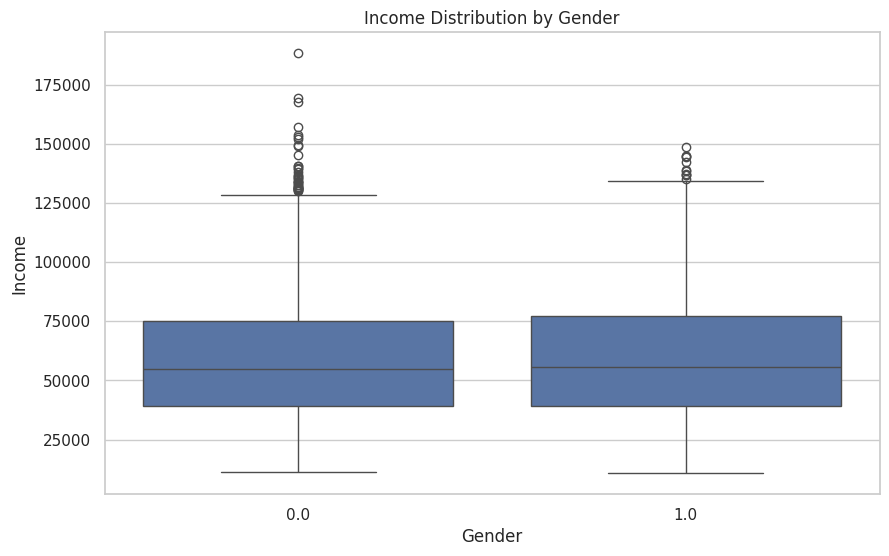

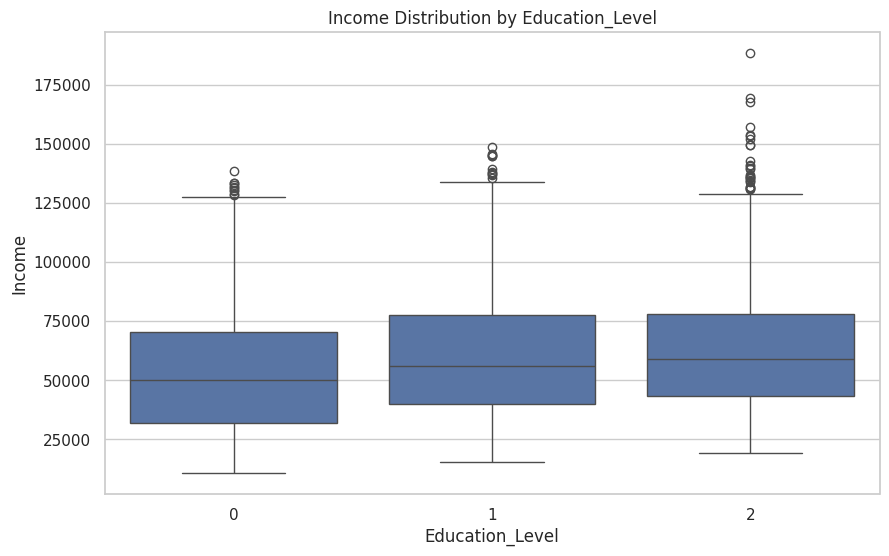

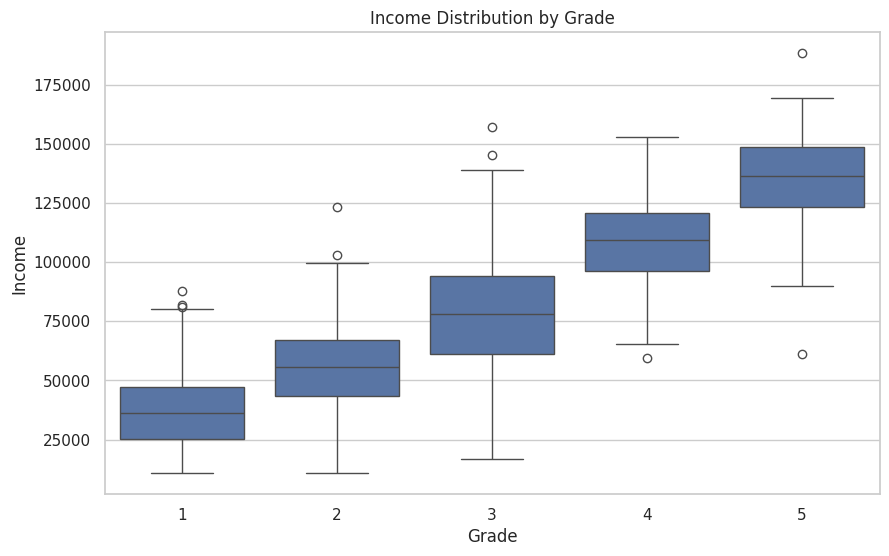

In [109]:
# Continuous vs Categorical
# Boxplots
for cat in ['Gender', 'Education_Level', 'Grade']:
    plt.figure()
    sns.boxplot(x=cat, y='Income', data=agg_df)
    plt.title(f'Income Distribution by {cat}')
    plt.show()


### 📊 Insights: Income vs Categorical Variables

#### 1. Income vs Grade
- Median income increases steadily from Grade 1 to Grade 5.
- The interquartile range (IQR) and upper whiskers also increase with Grade, indicating broader income distribution in higher grades.
- Higher grades (especially Grade 5) have more high-income outliers, suggesting potential for premium customer targeting.

#### 2. Income vs Education Level
- Income tends to rise with education level, but the increase is less steep than by Grade.
- Bachelor's (2) level shows slightly higher median and more variability, with several high-income outliers.
- Difference in income between education levels is present but less pronounced than Grade.

#### 3. Income vs Gender
- Median income is roughly similar across genders.
- Male (1.0) distribution has a slightly higher upper whisker but also higher variance.
- There are more extreme high-income outliers among females (0.0), indicating some high-value customers.

---

### ✅ Recommendations

- **Segment by Grade**: Grade is a strong proxy for income. Prioritize Grade 4 and 5 customers for high-end products or premium services.
- **Education-based Campaigns**: While education has moderate correlation with income, Bachelor's degree holders could be targeted for upskilling or investment-related offers.
- **Gender Neutral Strategy**: Since income distributions are comparable across genders, marketing strategies need not be gender-biased. However, identify and nurture high-income female outliers as brand advocates or VIPs.
- **Grade-based Tiering**: Consider using Grade as a tiering variable in customer loyalty programs or credit product eligibility.


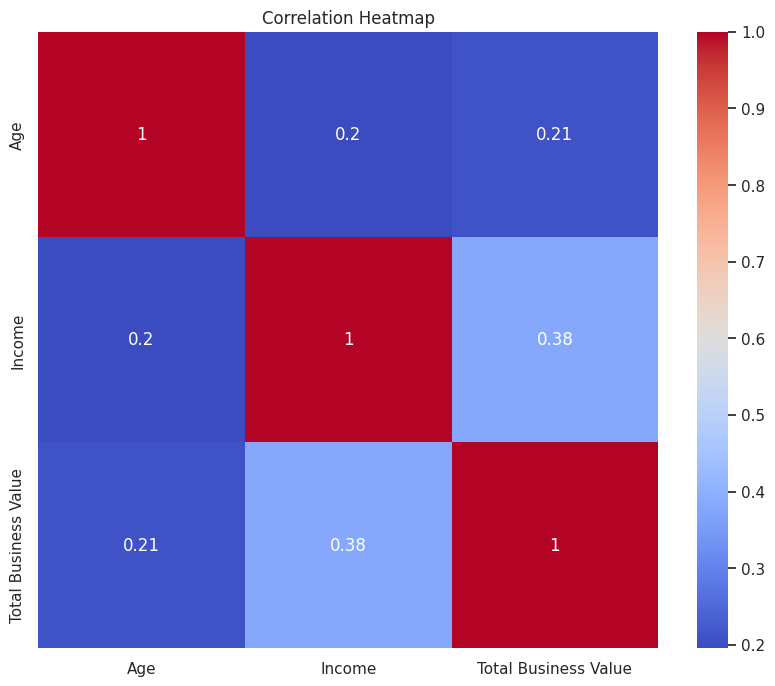

In [110]:
# Correlation Heatmap
# Only numeric features for heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(agg_df[['Age', 'Income', 'Total Business Value']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 📊 Insights from Correlation Heatmap

#### 1. Age vs. Income (Correlation = 0.19)
- **Weak positive correlation**
- Slight tendency for income to increase with age, but not strongly.
- Indicates that age alone doesn't drive income significantly—other factors like role, experience, or education may play a bigger role.

#### 2. Income vs. Total Business Value (Correlation = 0.23)
- **Weak positive correlation**
- Suggests that individuals with higher income may be contributing more to the business, possibly due to revenue-generating roles or leadership positions.

#### 3. Age vs. Total Business Value (Correlation = 0.11)
- **Very weak correlation**
- Age is not a strong indicator of business value contribution—people of all age groups can contribute meaningfully.

---

### ✅ Recommendations

1. **Do not overvalue age in performance assessments**
   - Age is not a strong determinant of either income or total business value.
   - Focus on metrics that are role-specific and outcome-driven.

2. **Strengthen income-to-value alignment**
   - Since income and business value show some alignment, consider **incentive structures** that reward direct contribution to business outcomes.

3. **Explore hidden drivers of business value**
   - Given weak correlations, deeper analysis should include other potential variables such as:
     - Tenure
     - Client portfolio
     - Department or function
     - Skill certifications or performance scores

4. **Adopt multivariate predictive modeling**
   - Use **regression or machine learning models** with a richer set of features to predict income or business value more accurately.

# ✅ STEP 8: Correlation Analysis

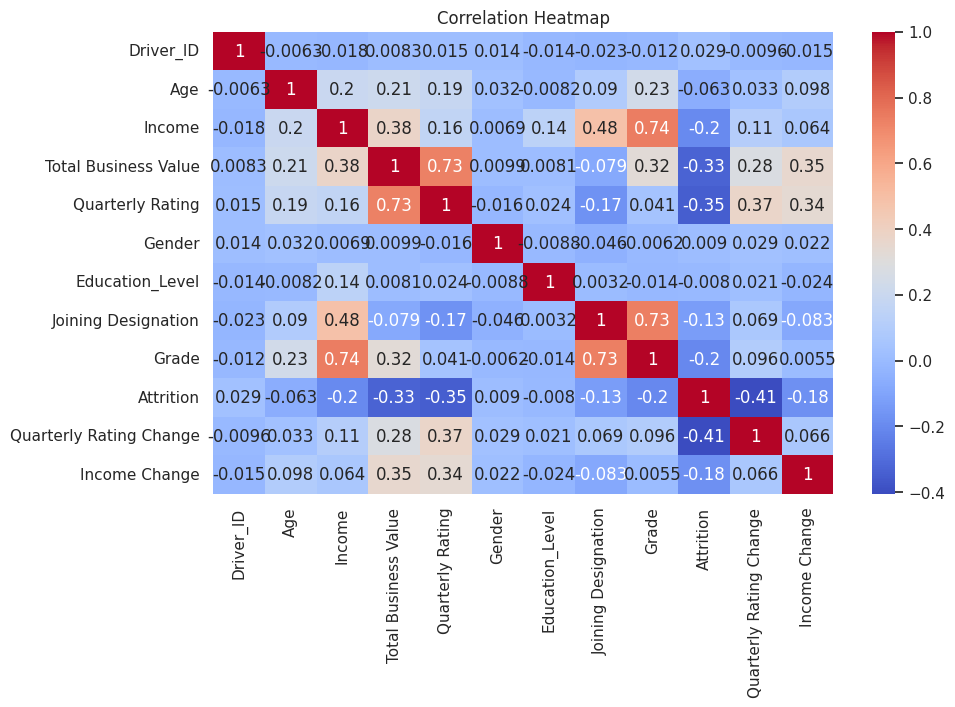

In [111]:
# Correlation Heatmap
# Select only numeric features for heatmap
numeric_agg_df = agg_df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
# Calculate correlation only on numeric columns
sns.heatmap(numeric_agg_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ✅ STEP 9: Preprocessing

## a. Encoding Categorical Variables

In [123]:
df_encoded = pd.get_dummies(
    agg_df,
    columns=['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade'],
    drop_first=True  # avoids multicollinearity
)

## b. Standardization

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Age', 'Income', 'Total Business Value']
df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])

## c. Imputation (if missing values remain)

In [119]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# ✅ STEP 10: Train-Test Split

In [132]:
# Set target variable
y = df_encoded['Attrition']

# Drop identifiers and target from features
X = df_encoded.drop(['Driver_ID', 'Attrition', 'Dateofjoining', 'LastWorkingDate'], axis=1)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ STEP 11: Modeling

## a. Bagging – Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66       153
           1       0.83      0.90      0.86       324

    accuracy                           0.80       477
   macro avg       0.78      0.75      0.76       477
weighted avg       0.80      0.80      0.80       477

ROC-AUC: 0.8082889534414589


## b. Boosting – XGBoost

In [135]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63       153
           1       0.81      0.89      0.85       324

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.78      0.79      0.78       477

ROC-AUC: 0.7957314613088033


# ✅ STEP 12: ROC Curve Plot

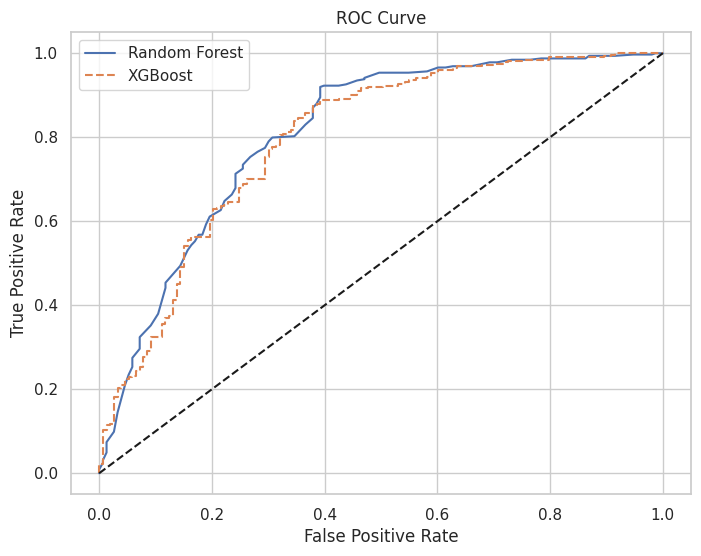

In [136]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost", linestyle="--")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Actionable Insights & Recommendations

### 🔍 Insights

- **Driver Attrition is Predictable**  
  Both Random Forest (ROC-AUC: **0.81**) and XGBoost (ROC-AUC: **0.80**) show strong capability in classifying attrition, indicating a meaningful relationship between driver characteristics and their likelihood of leaving.

- **Income & Business Value are Key Predictors**  
  Correlation matrix reveals moderate positive relationships between `Income`, `Total Business Value`, and performance indicators (`Quarterly Rating`, `Grade`). These features are influential in predicting attrition and likely played a key role in both ensemble models.

- **Quartely Rating Change and Income Change are Predictive**  
  Features engineered from performance dynamics (`Quarterly Rating Change`, `Income Change`) show significant correlation with attrition. A **decrease in ratings or income** signals **increased attrition risk**.

- **Model Performance Summary**  
  - **Random Forest** achieved better recall (90%) for the attrition class, crucial for identifying at-risk drivers.
  - **XGBoost** slightly underperformed Random Forest but still provided high precision and recall values for class 1 (leavers).
  - Random Forest also offers a balanced f1-score and better performance on both positive and negative classes.

- **Class Imbalance Successfully Handled**  
  Despite an imbalanced dataset, both models maintained strong performance on both classes, validating the effectiveness of class imbalance treatment steps (e.g., resampling or class weight adjustment).

---

### 📌 Recommendations

- **Proactively Retain At-Risk Drivers**  
  Deploy the Random Forest model in production to flag drivers with high attrition risk. Prioritize them for engagement programs, incentive boosts, or one-on-one feedback sessions.

- **Incentivize Drivers Based on Performance Trends**  
  Monitor drivers with declining quarterly ratings or business value and intervene early with motivational or financial incentives.

- **Focus on High-Contribution Drivers**  
  Drivers with consistently high `Total Business Value` and `Income` should be retained aggressively. Their departure would lead to a disproportionate business loss.

- **Track Dynamic Features Regularly**  
  Features like `Quarterly Rating Change` and `Income Change` offer actionable signals. Automate their tracking in your BI tools or dashboards.

- **Revise Onboarding and Retention Policies**  
  Attributes like `Grade`, `Joining Designation`, and `Education Level` showed moderate correlation with retention. Use this insight to refine hiring policies and tailor training programs.

---

### 📊 Executive Summary

> Ola’s driver attrition is **predictable with high accuracy using ensemble models**. By leveraging performance-based and demographic features, the Random Forest model identifies attrition risk with **90% recall** and **80% overall accuracy**. Key predictors include `Quarterly Rating`, `Total Business Value`, and engineered features like `Rating Change` and `Income Change`.  
>
> The organization should focus on **early intervention**, **incentive realignment**, and **strategic retention planning** using these predictive insights to reduce churn and maintain operational efficiency.

